<a href="https://colab.research.google.com/github/surajkumar089/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 Tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### The Features of The Dataset:

1. UserName
2. ScreenName
3. Location
4. TweetAt
5. OriginalTweet
6. Sentiment

# Import Libraries

In [ ]:
# Import package
import pandas as pd
import numpy as np
import ast
import re # for regular expression operations 
import string
from datetime import datetime as dt
from datetime import date
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import Sklearn Libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,roc_curve

In [ ]:
# NLP Libraries
import nltk # for text manipulation
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# mounting drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [ ]:
# Loading csv File
Tweet_df=pd.read_csv('/content/drive/MyDrive/coronavirus tweets/Coronavirus Tweets.csv',encoding = 'latin')
print("Tweet_df")
print("Rows {} Columns {}".format(Tweet_df.shape[0], Tweet_df.shape[1]))

Tweet_df
Rows 41157 Columns 6


# Getting the information of the Dataset

In [ ]:
# Information about different columns of the Dataset
Tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
# Using head function to get first 10 rows
Tweet_df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [ ]:
# Getting information about the last 5 record
Tweet_df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [ ]:
# Information about the descriptions of the data set.
Tweet_df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


# Null Values Operation

In [ ]:
# Getting the information about the null value.
Tweet_df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Here, we can see that the Location column includes exactly 8594 null values.
<br><br>
#### **we don't need to delete the null values from the Location column Because we need to categorise the tweet based on the text in the OriginalTweet column. Additionally, we don't want to lose the important data in the dataset because might be affect the performance of our model.**

<br>

# **Understanding the features of our dataset & Exploratory Data Analysis(EDA)**

In [ ]:
Tweet_df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

## Top 20 Location with highest tweets

In [ ]:
# Top 20 Location with highest tweets
tweet_location=Tweet_df['Location'].value_counts().reset_index().rename(columns = {'index':'Location','Location':'Tweet_no'})
tweet_location=tweet_location.sort_values(by='Tweet_no',ascending=False).head(21)
tweet_location

,Location,Tweet_no
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


Text(0.5, 1.0, 'Top Location with highest tweets')

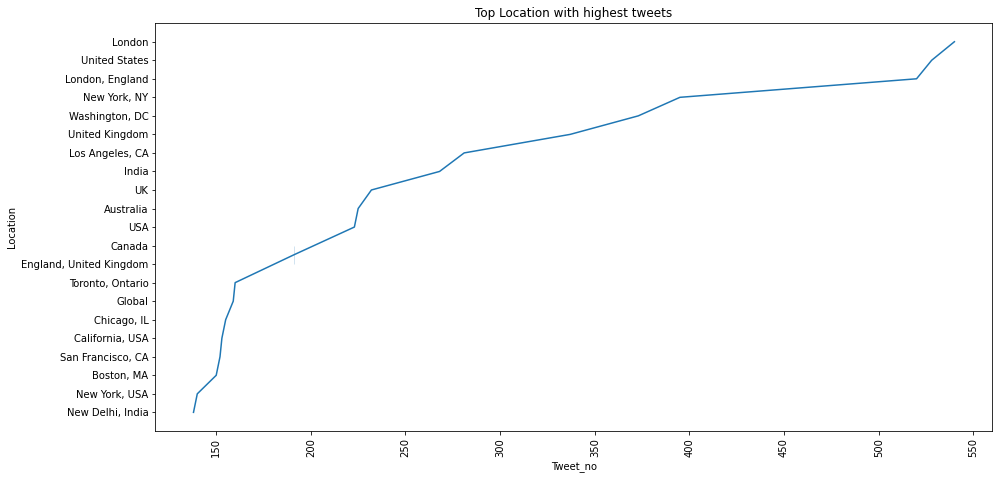

In [ ]:
# Visualization Top 20 Location with highest tweets
plt.figure(figsize=(15,7.5))
sns.lineplot(data=tweet_location, x="Tweet_no",y="Location")
plt.xticks(rotation=90)
plt.title('Top Location with highest tweets')

##Exploring the Sentiment Column

In [ ]:
# Count of tweets as per sentiment
Sentiment=Tweet_df['Sentiment'].value_counts().reset_index().rename(columns = {'index':'Sentiment Types','Sentiment':'Counts'})
print(Sentiment)

      Sentiment Types  Counts
0            Positive   11422
1            Negative    9917
2             Neutral    7713
3  Extremely Positive    6624
4  Extremely Negative    5481


Text(0.5, 1.0, 'Sentiments Types Tweet')

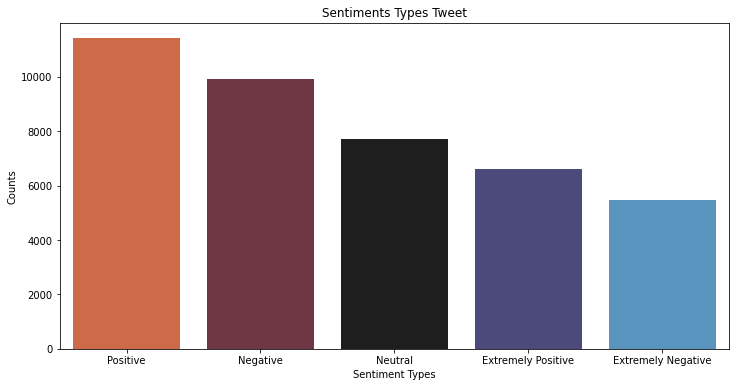

In [ ]:
# Seaborn Bar plot Count of tweets as per sentiment
plt.figure(figsize=(12,6))
sns.barplot(data=Sentiment, x="Sentiment Types",y="Counts",palette ='icefire_r')

plt.title('Sentiments Types Tweet')

# **There are 5 subcategories in this case, so we will combine 5-class classification problem into a 3-class classification problem by replace Extremely Positive tweets with positive tweets and Extremely Negative tweets with negative tweets.**

In [ ]:
# Replacing these values 'Extremely Negative' : 'Negative', 'Extremely Positive' : 'Positive'
replace_values = {"Sentiment": {'Extremely Negative' : 'Negative', 'Extremely Positive' : 'Positive'}}
replacing_data = Tweet_df.replace(replace_values)

In [ ]:
# After the replacing count these sentiment values
sentiment_count = replacing_data['Sentiment'].value_counts().reset_index()
sentiment_count.columns=['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


Text(0, 0.5, 'Count')

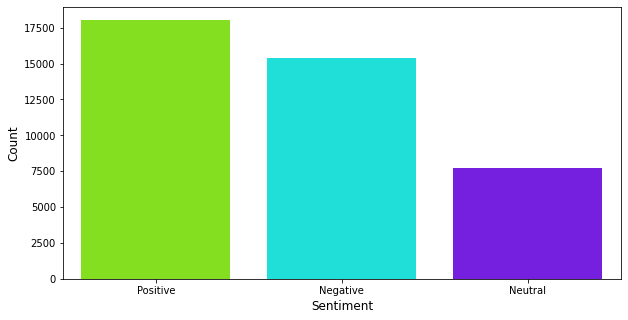

In [ ]:
# Plotting the graph for the total number of tweets for the new 3 subcategories of the target variable
plt.figure(figsize=(10,5))
sns.barplot(x="Sentiment", y= 'count', data=sentiment_count,palette='hsv')
plt.xlabel("Sentiment",fontsize=12)
plt.ylabel("Count",fontsize=12)

## **Top dates with maximum number of tweets**

In [ ]:
# Top dates with maximum number of tweets
Tweet_count=Tweet_df['TweetAt'].value_counts().reset_index().rename(columns = {'index':'Tweet_Date'})
Tweet_20=Tweet_count.sort_values(by='TweetAt',ascending=False).head(21)
print(Tweet_20)

    Tweet_Date  TweetAt
0   20-03-2020     3448
1   19-03-2020     3215
2   25-03-2020     2979
3   18-03-2020     2742
4   21-03-2020     2653
5   22-03-2020     2114
6   23-03-2020     2062
7   17-03-2020     1977
8   08-04-2020     1881
9   07-04-2020     1843
10  06-04-2020     1742
11  24-03-2020     1480
12  09-04-2020     1471
13  13-04-2020     1428
14  26-03-2020     1277
15  05-04-2020     1131
16  10-04-2020     1005
17  02-04-2020      954
18  11-04-2020      909
19  03-04-2020      810
20  12-04-2020      803


Text(0.5, 1.0, 'Top dates with maximum number of tweets')

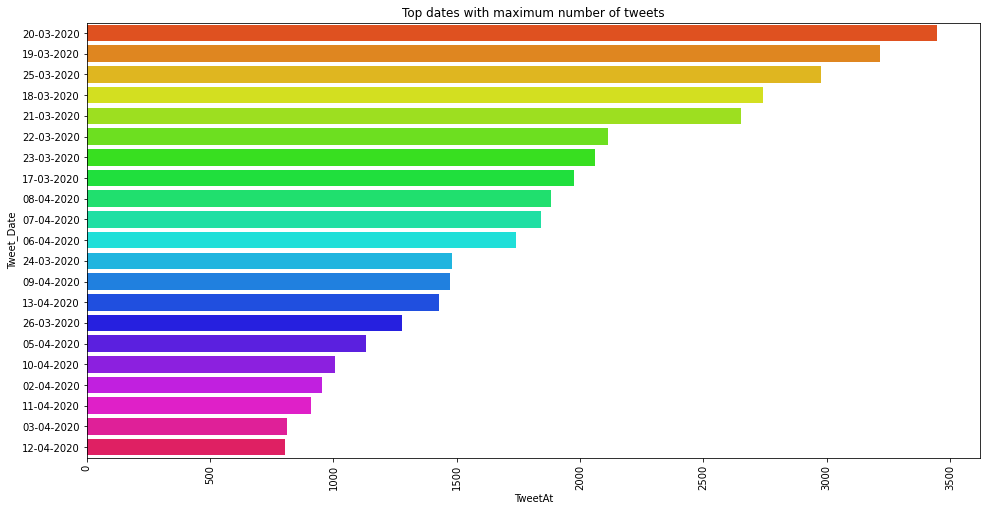

In [ ]:
# seaborn Bar plot Top dates with maximum number of tweets
plt.figure(figsize=(16,8))
sns.barplot(data=Tweet_20, x="TweetAt",y="Tweet_Date",palette = ('hsv'))
plt.xticks(rotation=90)
plt.fontsize=12
plt.title('Top dates with maximum number of tweets')


# **Data Processing**

##**1.**<b> Text Pre-processing </b>

In [ ]:
# Removing punctuation
# Writing a function which removes punctuation from our dataset
def remove_punc(text):
  no_punc = [char for char in text if char not in string.punctuation]
  return ''.join(no_punc)

In [ ]:
# Creating another column TokenizedTweet and store the Clean punctuation
Tweet_df['TokenizedTweet'] = Tweet_df['OriginalTweet'].apply(remove_punc)

In [ ]:
Tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TokenizedTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COVID...


##**2.**<b> Removing stopwords</b>

In [ ]:
# Removing stopwords
# Writing a function which removes stopwords from our data set
stop_list=list(stopwords.words('english'))
def remove_stopwords(msg):
    no_stop_words = [word for word in msg.split() if word.lower() not in stop_list]
    return ' '.join(no_stop_words)

In [ ]:
Tweet_df['TokenizedTweet'] = Tweet_df['TokenizedTweet'].apply(remove_stopwords)

In [ ]:
Tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TokenizedTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty PLEASE dont panic ENOUGH ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket COVID19 outbreak Im paran...


##**3.**<b> Stemming-</b>
##Words are cropped to save space. SnowballStemmer will be used for that.

In [ ]:
# Creating an object of SnowballStemmer
stemmer = SnowballStemmer("english")

# Function for stemming each word of the given text
def stemming(txt):
    text = [stemmer.stem(word) for word in txt.split()]
    return ' '.join(text)

In [ ]:
Tweet_df['TokenizedTweet'] = Tweet_df['TokenizedTweet'].apply(stemming)

In [ ]:
Tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TokenizedTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbi philgahan chrisitv httpstcoifz9fan2pa ...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elder dis...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empti pleas dont panic enough f...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,readi go supermarket covid19 outbreak im paran...


#**Creating a word cloud to see frequently occurring words in tweets**

##After removing punctuation, stopwords and usnig stemming to words cropped to save space from the tweets we want to know which words are mostly used by the people.

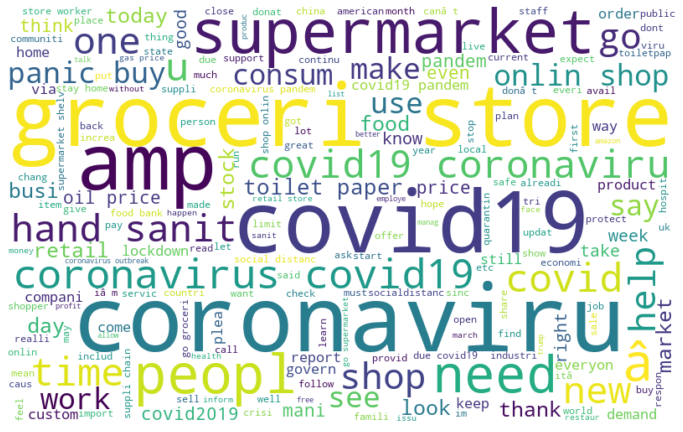

In [ ]:
# Creating a text of words present in all the tweets
from wordcloud import WordCloud, STOPWORDS
all_words = ' '.join([str(text) for text in Tweet_df['TokenizedTweet']])
wordcloud = WordCloud(width=800, 
                      height=500, 
                      stopwords=set(STOPWORDS),
                      background_color="white", 
                      random_state=21, 
                      max_font_size=110).generate(all_words)
# Displaying the generated word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#####Here, we can see the most frequently used terms in tweets are COVID19, coronavirus, store, grocery, shopping, people, supermarket, pricing, etc., indicating that consumers were mostly worried about food supplies.

<br>

# **Building Classification Models**
<br>

### We will be using tf-idf method for vectorising the text. 
###Then, we will implement 4 models: 
1. Logistic Regression
2. Random Forest Classifier
3. Naive Bayes Classifier
4. Support Vector Machine(SVM)

### We will determine which model has the highest accuracy score before selecting it for model building.

## **Splitting data into train and test set**

In [ ]:
# Obtaining independent variables
X = Tweet_df['TokenizedTweet']

In [ ]:
# Obtaining dependent variable
y = Tweet_df['Sentiment']

In [ ]:
# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(32925,) (32925,) (8232,) (8232,)


## **Vectorization**

### Creating an object of TfidfVectorizer, the test data was normalised, and stored in the variables X_test and X_train, and also both predicting actual and predicted values.

In [ ]:
# Creating an object of TfidfVectorizer
tf_idf = TfidfVectorizer()

In [ ]:
# Applying tf idf to training and test data
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)

In [ ]:
# Print the variables
print(X_train_tf.shape)
print(X_test_tf.shape)
print(y_train.shape)
print(y_test.shape)

(32925, 63453)
(8232, 63453)
(32925,)
(8232,)


<br>

# **Implementing Logistic Regression**

In [ ]:
# creating an object of LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()

In [ ]:
# Here, we fit the model, predicting on test set and finding the evaluation metrics for a model.

# Fitting logistic reg. training dataset
logistic_reg.fit(X_train_tf, y_train)

# Predicting test model
logistic_reg_prediction = logistic_reg.predict(X_test_tf)

# Finding the accuracy_score & evaluation metrics for a model
logreg_accuracy = accuracy_score(y_test,logistic_reg_prediction)
print("Training accuracy Score : ",logistic_reg.score(X_train_tf,y_train).round(4))
print("Testing accuracy Score : ",logreg_accuracy.round(4))
print(classification_report(logistic_reg_prediction,y_test))

Training accuracy Score :  0.8091
Testing accuracy Score :  0.5804
                    precision    recall  f1-score   support

Extremely Negative       0.53      0.67      0.59       860
Extremely Positive       0.57      0.67      0.61      1128
          Negative       0.53      0.53      0.53      1989
           Neutral       0.65      0.65      0.65      1542
          Positive       0.61      0.51      0.56      2713

          accuracy                           0.58      8232
         macro avg       0.58      0.61      0.59      8232
      weighted avg       0.58      0.58      0.58      8232



<br>

# **Implementing Random Forest Classifier**

In [ ]:
# creating an object of RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

Randm_Forest_Clf = RandomForestClassifier()

In [ ]:
# Here, we fit the model, predicting on test set and finding the evaluation metrics for a model.
Randm_Forest_Clf.fit(X_train_tf,y_train)

# Predicting test model
Randm_Forest_prediction = Randm_Forest_Clf.predict(X_test_tf)

# Finding the accuracy_score & evaluation metrics for a model
Randm_Forest_accuracy = accuracy_score(y_test,Randm_Forest_prediction)
print("Training accuracy Score : ",Randm_Forest_Clf.score(X_train_tf,y_train))
print("Testing accuracy Score : ",Randm_Forest_accuracy)
print(classification_report(Randm_Forest_prediction,y_test))

Training accuracy Score :  0.999969627942293
Testing accuracy Score :  0.5221088435374149
                    precision    recall  f1-score   support

Extremely Negative       0.34      0.73      0.47       515
Extremely Positive       0.36      0.69      0.47       683
          Negative       0.48      0.48      0.48      1989
           Neutral       0.74      0.55      0.63      2059
          Positive       0.59      0.46      0.52      2986

          accuracy                           0.52      8232
         macro avg       0.50      0.58      0.51      8232
      weighted avg       0.57      0.52      0.53      8232



#  **Implementing Naive Bayes Classifier**

In [ ]:
#Creating an object of  Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
multinomial_naive_bayes = MultinomialNB()

In [ ]:
# Fitting Naive Bayes classifier 
multinomial_naive_bayes.fit(X_train_tf,y_train)

# Predicting test model
multinomial_naive_bayes_prediction = multinomial_naive_bayes.predict(X_test_tf)

# Finding the accuracy_score & evaluation metrics for a model
multinomial_naive_bayes_accuracy = accuracy_score(y_test,multinomial_naive_bayes_prediction)
print("Training accuracy Score : ",multinomial_naive_bayes.score(X_train_tf,y_train))
print("Testing accuracy Score : ",multinomial_naive_bayes_accuracy)
print(classification_report(multinomial_naive_bayes_prediction,y_test))

Training accuracy Score :  0.5162642369020501
Testing accuracy Score :  0.3595724003887269
                    precision    recall  f1-score   support

Extremely Negative       0.01      0.88      0.03        17
Extremely Positive       0.02      0.83      0.03        24
          Negative       0.39      0.40      0.39      1907
           Neutral       0.05      0.80      0.09        91
          Positive       0.91      0.34      0.49      6193

          accuracy                           0.36      8232
         macro avg       0.27      0.65      0.21      8232
      weighted avg       0.77      0.36      0.46      8232



<br>

# **Implementing Support Vector Machine(SVM)**

In [ ]:
# creating an object of Support Vector Classifier
svc = SVC()

In [ ]:
# fitting SVC on training dataset
svc.fit(X_train_tf, y_train)

# Predicting test model
svc_prediction = svc.predict(X_test_tf)

# Finding the accuracy_score & evaluation metrics for a model
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score : ",svc.score(X_train_tf,y_train))
print("Testing accuracy Score : ",svc_accuracy)
print(classification_report(svc_prediction,y_test))

Training accuracy Score :  0.9659529233105543
Testing accuracy Score :  0.5954810495626822
                    precision    recall  f1-score   support

Extremely Negative       0.48      0.72      0.58       730
Extremely Positive       0.53      0.75      0.62       936
          Negative       0.58      0.54      0.56      2135
           Neutral       0.63      0.67      0.65      1451
          Positive       0.68      0.52      0.59      2980

          accuracy                           0.60      8232
         macro avg       0.58      0.64      0.60      8232
      weighted avg       0.61      0.60      0.59      8232



* Support Vector Classifier has performed slightly better than the Logistic regression and got the highest test accuracy score around 60%.

* Multinomial Naive Bayes performed the worst with test accuracy score of just 0.35.

<br>

# **Conclusion:**

* ### The majority of the tweets were around 250 characters long, indicating that there was a lot of interest in COVID-19 among the general public.

* ### More positive tweets than neutral or negative ones were tweeted globally.

* ### People tweeted more in March than in April since many nations imposed lockdown during this time.

* ### The United States and London (England) were the two countries with the most tweets.

* ### We saw inconsistent responses from Australia during the pandemic, with nearly equal numbers of positive and negative tweets.

* ### Words like COVID19, grocery, supermarket, shop, price, etc. are frequently used in tweets, indicating that throughout the pandemic, individuals were mostly concerned about food supply and their costs.

* ### Support Vector Classifier has performed slightly better than the Logistic regression and got the highest test accuracy score around 60%.

* ### Multinomial Naive Bayes performed the worst with test accuracy score of just 0.35.